In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def list_str2float(x):
    return list(map(float, x.replace('[','').replace(']','').split(',')))

def accepted_h0(pvals, alpha):
    return np.mean(np.array(list_str2float(pvals)) > alpha)

## Mean Power

In [3]:
def mean_power(dim, n, norm, alpha=0.05):
    df = pd.read_csv(f'../results/dim={dim}_n={n}_norm={norm}_method=approximate.csv')
    dists = df.true_dist.unique()
    powers = []
    signifs = []
    
    for dist_true in dists:
        for dist_alter in dists:
            df_filtred = df[(df['true_dist'] == dist_true) & (df['alter_dist'] == dist_alter)]
            power = 1 - accepted_h0(df_filtred.pvals.values[0], alpha)
            if dist_true == dist_alter:
                signifs.append(power)
            else:
                powers.append(power)
    return np.mean(powers), np.mean(signifs)

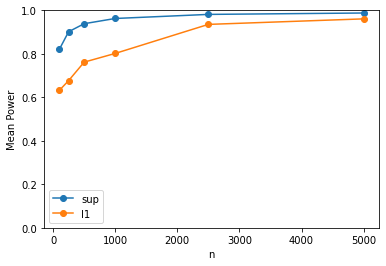

In [13]:
ns = [100, 250, 500, 1000, 2500, 5000]
dim=3
norms=['sup', 'l1']
plt.rcParams['figure.figsize'] = [6, 4]
for norm in norms:
    results = []
    for n in ns:
        power, signif = mean_power(dim=dim, n=n, norm=norm, alpha=0.05)
        results.append([n, power, signif])
    results = np.array(results)
    plt.plot(results[:, 0], results[:, 1], 'o-', label=norm)

plt.xlabel('n')
plt.ylabel('Mean Power')
plt.ylim((0,1))
plt.legend()

## Power as heat maps

In [107]:
def plot_power_matrix_tt(df, label, alpha=0.05, output_to_file=True):
    dists = df.true_dist.unique()
    n_dist = len(dists)
    values = np.zeros((n_dist, n_dist))
    avg_power = []
    signif = []
    for id_td, td in enumerate(dists):
        for id_ad, ad in enumerate(dists):
            df_filtred = df[(df['true_dist'] == td) & (df['alter_dist'] == ad)]
            try:
                values[id_td, id_ad] = 1 - accepted_h0(df_filtred.pvals.values[0], alpha)
            except:
                values[id_td, id_ad] = np.nan
            if td != ad:
                avg_power.append(values[id_td, id_ad])
            else:
                signif.append(values[id_td, id_ad])
    avg_power = np.nanmean(avg_power)
    initial_fig_size = plt.rcParams['figure.figsize']
    plt.rcParams['figure.figsize'] = [11, 10]
    plt.imshow(values)
    plt.xticks(ticks=range(len(dists)), labels=dists, rotation=90)
    plt.yticks(range(len(dists)), labels=dists)
    plt.xlabel('ALTER Distribution')
    plt.ylabel('TRUE Distribution')
    plt.title(f'{label} \n Average Power: {avg_power:.4f}', fontsize=14)
    c = plt.colorbar()
    plt.clim(0, 1)
    if output_to_file:
        plt.savefig(f'plots/{label.replace(" ", "_")}.pdf', bbox_inches='tight')
    else:
        plt.show()
    plt.rcParams['figure.figsize'] = initial_fig_size
    plt.clf()
    
def plot_power_matrix_ks(df, label, alpha=0.05, output_to_file=True):
    dists = df.alter_dist.unique()
    n_dist = len(dists)
    values = np.zeros((n_dist, n_dist))
    avg_power = []
    signif = []
    for id_td, td in enumerate(dists):
        # find critial value of KS statistic
        df_filtred = df[(df['true_dist'] == td) & (df['alter_dist'] == td)]
        try:
            D = np.quantile(list_str2float(df_filtred.dks.values[0]), 1-alpha)
        except:
            D = np.nan
        for id_ad, ad in enumerate(dists):
            df_filtred = df[(df['true_dist'] == td) & (df['alter_dist'] == ad)]
            try:
                values[id_td, id_ad] = 1 - np.mean(list_str2float(df_filtred.dks.values[0]) < D)
            except:
                values[id_td, id_ad] = np.nan
            if td != ad:
                avg_power.append(values[id_td, id_ad])
            else:
                signif.append(values[id_td, id_ad])
    avg_power = np.nanmean(avg_power)
    initial_fig_size = plt.rcParams['figure.figsize']
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.imshow(values)
    plt.xticks(ticks=range(len(dists)), labels=dists, rotation=90)
    plt.yticks(range(len(dists)), labels=dists)
    plt.xlabel('ALTER Distribution')
    plt.ylabel('TRUE Distribution')
    plt.title(f'{label} \n Average Power: {avg_power:.4f}', fontsize=14)
    c = plt.colorbar()
    plt.clim(0, 1)
    if output_to_file:
        plt.savefig(f'plots/{label.replace(" ", "_")}.pdf', bbox_inches='tight')
    else:
        plt.show()
    plt.rcParams['figure.figsize'] = initial_fig_size
    plt.clf()

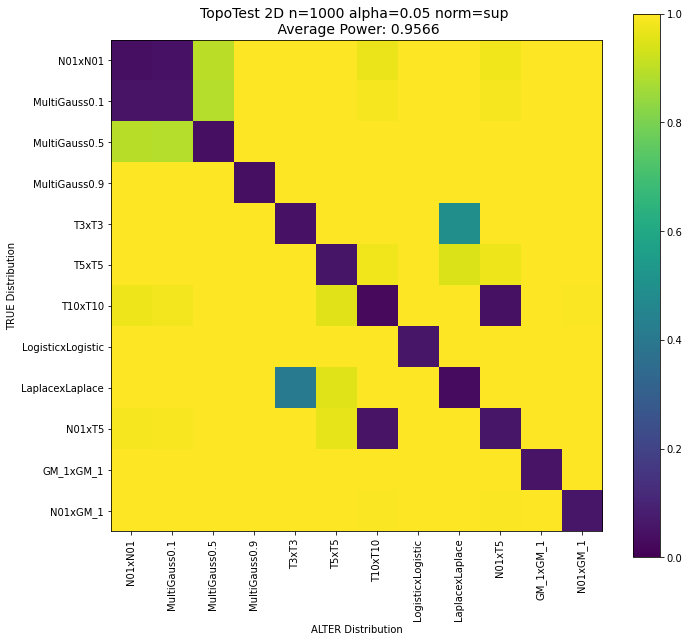

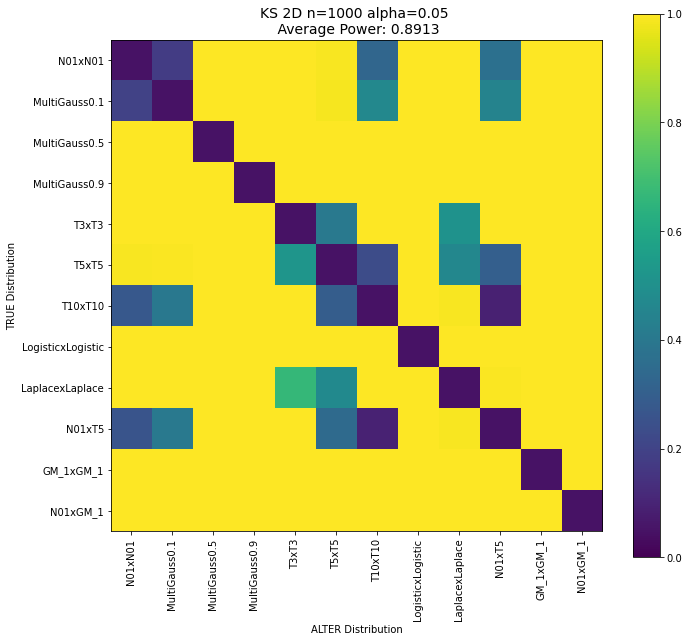

<Figure size 792x720 with 0 Axes>

In [108]:
# make one plot to see how it works
dim=2
n=1000
alpha=0.05
norm='sup'
df_tt = pd.read_csv(f'../results/dim={dim}_n={n}_norm={norm}_method=approximate.csv')
plot_power_matrix_tt(df_tt, label=f'TopoTest {dim}D n={n} alpha={alpha} norm={norm}', alpha=alpha,
                    output_to_file=False)

df_ks = pd.read_csv(f'../results/ks_dim={dim}_n={n}.csv')
plot_power_matrix_ks(df_ks, label=f'KS {dim}D n={n} alpha={alpha}', alpha=alpha,
                    output_to_file=False)

In [ ]:
dims = [1, 2, 3]
ns=[100, 250, 500, 1000, 2500]
alpha=0.05
norm='sup'
for dim in dims:
    for n in ns:
        df_tt = pd.read_csv(f'../results/dim={dim}_n={n}_norm={norm}_method=approximate.csv')
        plot_power_matrix_tt(df_tt, label=f'TopoTest {dim}D n={n} alpha={alpha} norm={norm}', alpha=alpha,
                            output_to_file=True)

        df_ks = pd.read_csv(f'../results/ks_dim={dim}_n={n}.csv')
        plot_power_matrix_ks(df_ks, label=f'KS {dim}D n={n} alpha={alpha}', alpha=alpha,
                            output_to_file=True)